In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [2]:
# df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
# X = df.drop("target", axis=1)
# y = df['target']

# from sklearn.dummy import DummyClassifier
# model = DummyClassifier(strategy='most_frequent').fit(X,y)
# # 
# X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")
# y_pred=model.predict(X_test)

# submission= pd.DataFrame({"id": range(0,X_test.shape[0]), 
#                           "target": y_pred})

# submission.to_csv('submission.csv',index=False)

# Steps to perform end-to-end Machine Learning pipeline

1. **Loading & Understanding Data**
2. **Exploratory Data Analysis (EDA)**
3. **Data Preprocessing & Feature Engineering**
4. **Splitting Data into Training & Testing Sets**
5. **Model Selection & Training**
6. **Model Evaluation & Optimization**

## Step 1: Loading and Understanding Data

### Define the problem statement
**Goal**: Develop a machine learning model that predicts the probability of a system getting infected by malware based on various system properties.


###  Loading Basic libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading the dataset

In [4]:
data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")

### Dataset information
**Features:-**
- 'MachineID' : Unique Identifier for Each Machine
- 'ProductName': Name of the Installed Antivirus Product
- 'EngineVersion': Version of the Antivirus Engine
- 'AppVersion' : Version of the Antivirus Application
- 'SignatureVersion': Version of the Antivirus Signatures
- 'IsBetaUser': Whether the User is on a Beta Version
- 'RealTimeProtectionState': Status of Real-Time Protection
- 'IsPassiveModeEnabled' : Whether Passive Mode is Enabled
- 'AntivirusConfigID' : Identifier for Antivirus Configuration
- 'NumAntivirusProductsInstalled' : Number of Installed Antivirus Products
- 'NumAntivirusProductsEnabled' : Number of Enabled Antivirus Products
- 'HasTpm' : Whether the Machine has a Trusted Platform Module (TPM)
- 'CountryID': Identifier for the Country of the Machine
- 'CityID' : Identifier for the City of the Machine
- 'GeoRegionID' : Identifier for the Machine's Organization or Industry
- 'LocaleEnglishNameID' : English Locale Name ID of the Current User
- 'PlatformType' : Platform Type Derived from OS and Processor Information
- 'Processor' : Processor Architecture of the Installed OS
- 'OSVersion' : Operating System Version
- 'OSBuildNumber' : OS Build Number
- 'OSProductSuite' : Product Suite Mask for the Operating System
- 'OsPlatformSubRelease' : Sub-release of the Operating System
- 'OSBuildLab' : Detailed OS Build Information
- 'SKUEditionName' : SKU Edition of the Operating System
- 'IsSystemProtected' : Whether the System has Active Protection
- 'AutoSampleSubmissionEnabled' : Auto Sample Submission Setting
- 'SMode' : Whether the Device is Running in S Mode
- 'IEVersionID' : Internet Explorer Version Identifier
- 'FirewallEnabled' : Whether Windows Firewall is Enabled
- 'EnableLUA',
- 'MDC2FormFactor',
- 'DeviceFamily',
- 'OEMNameID',
- 'OEMModelID',
- 'ProcessorCoreCount',
- 'ProcessorManufacturerID',
- 'ProcessorModelID',
   - 'PrimaryDiskCapacityMB',
- 'PrimaryDiskType',
- 'SystemVolumeCapacityMB',
   - 'HasOpticalDiskDrive',
- 'TotalPhysicalRAMMB',
- 'ChassisType',
   - 'PrimaryDisplayDiagonalInches',
- 'PrimaryDisplayResolutionHorizontal',
   - 'PrimaryDisplayResolutionVertical',
- 'PowerPlatformRole',
   - 'InternalBatteryNumberOfCharges',
- 'NumericOSVersion',
- 'OSArchitecture',
   - 'OSBranch',
- 'OSBuildNumberOnly',
- 'OSBuildRevisionOnly',
- 'OSEdition',
   - 'OSSkuFriendlyName',
- 'OSInstallType',
- 'OSInstallLanguageID',
   - 'OSUILocaleID',
- 'AutoUpdateOptionsName',
- 'IsPortableOS',
   - 'OSGenuineState',
- 'LicenseActivationChannel',
- 'IsFlightsDisabled',
   - 'FlightRing',
- 'FirmwareManufacturerID',
- 'FirmwareVersionID',
   - 'IsSecureBootEnabled',
- 'IsVirtualDevice',
- 'IsTouchEnabled',
- 'IsPenCapable',
- 'IsAlwaysOnAlwaysConnectedCapable',
- 'IsGamer',
   - 'RegionIdentifier',
- 'DateAS' : Malware signature dates ,
- 'DateOS' : timestamps for OSVersion which gives the time that the OS was last updated
- 'target'

### Check data samples
Let's look at few data samples with head() method

In [5]:
data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


look at number of features and rows with shape

In [6]:
data.shape

(100000, 76)

### Defining Feature list and label  

In [7]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print("Feature list:", feature_list)
print("Label:", label)

Feature list: ['MachineID' 'ProductName' 'EngineVersion' 'AppVersion' 'SignatureVersion'
 'IsBetaUser' 'RealTimeProtectionState' 'IsPassiveModeEnabled'
 'AntivirusConfigID' 'NumAntivirusProductsInstalled'
 'NumAntivirusProductsEnabled' 'HasTpm' 'CountryID' 'CityID' 'GeoRegionID'
 'LocaleEnglishNameID' 'PlatformType' 'Processor' 'OSVersion'
 'OSBuildNumber' 'OSProductSuite' 'OsPlatformSubRelease' 'OSBuildLab'
 'SKUEditionName' 'IsSystemProtected' 'AutoSampleSubmissionEnabled'
 'SMode' 'IEVersionID' 'FirewallEnabled' 'EnableLUA' 'MDC2FormFactor'
 'DeviceFamily' 'OEMNameID' 'OEMModelID' 'ProcessorCoreCount'
 'ProcessorManufacturerID' 'ProcessorModelID' 'PrimaryDiskCapacityMB'
 'PrimaryDiskType' 'SystemVolumeCapacityMB' 'HasOpticalDiskDrive'
 'TotalPhysicalRAMMB' 'ChassisType' 'PrimaryDisplayDiagonalInches'
 'PrimaryDisplayResolutionHorizontal' 'PrimaryDisplayResolutionVertical'
 'PowerPlatformRole' 'InternalBatteryNumberOfCharges' 'NumericOSVersion'
 'OSArchitecture' 'OSBranch' 'OSBuildNu

### Data Statistics
Let's use info() method to get quick description of data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

### Examining Number of Numerical and Categorical Features  

In [9]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = data.select_dtypes(include=['object']).columns.tolist()
print("Number of Numerical features: ", len(num_features))
print("Number of Categorical features: ", len(cat_features))

Number of Numerical features:  48
Number of Categorical features:  28


### Analyzing the Numerical Attributes
In order to understand the nature of numeric attributes, we use describe() method

In [10]:
data.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


### Examining the Target observation  

In [11]:
data['target'].value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

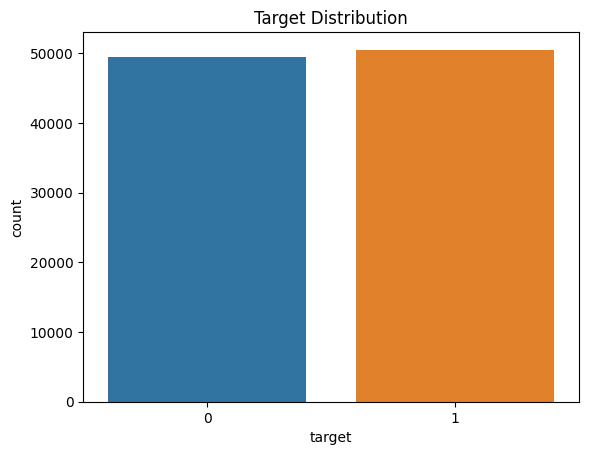

In [12]:
sns.countplot(x='target', data=data)
plt.title("Target Distribution")
plt.show()

### Key Insights from the Datasets
**Dataset Overview**
* It contains 1,00,000 enteries and 76 features.
* Each row represents a unique machine, and each column represents a system property.
* The last column, target, indicates whether the machine was infected by malware (1 = Infected, 0 = Not Infected).

**Target Variable Analysis**
* The target variable distribution shows:
  * target = 0: 49.5% of the data (Machines NOT infected)
  * target = 1: 50.5% of the data (Machines infected)
* So,the target variable is approximately equally distributed.

**Define the Type of the Problem**
* Since the output is binary(0 and 1).It is a **classification problem**.
* The model will estimate the probability of a machine being infected.

**Identify the Evaluation Metric**
* Accuracy

## Step 2: Exploratory Data Analysis (EDA)

It is always a good idea to create copy of the training set so that we can freely manipulate it without worrying about any manipulation in the original set.

In [13]:
exploration_set = data.copy()

###  Examining the Missing data in the dataset

In [14]:
data.isnull().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

### Missing Value Analysis

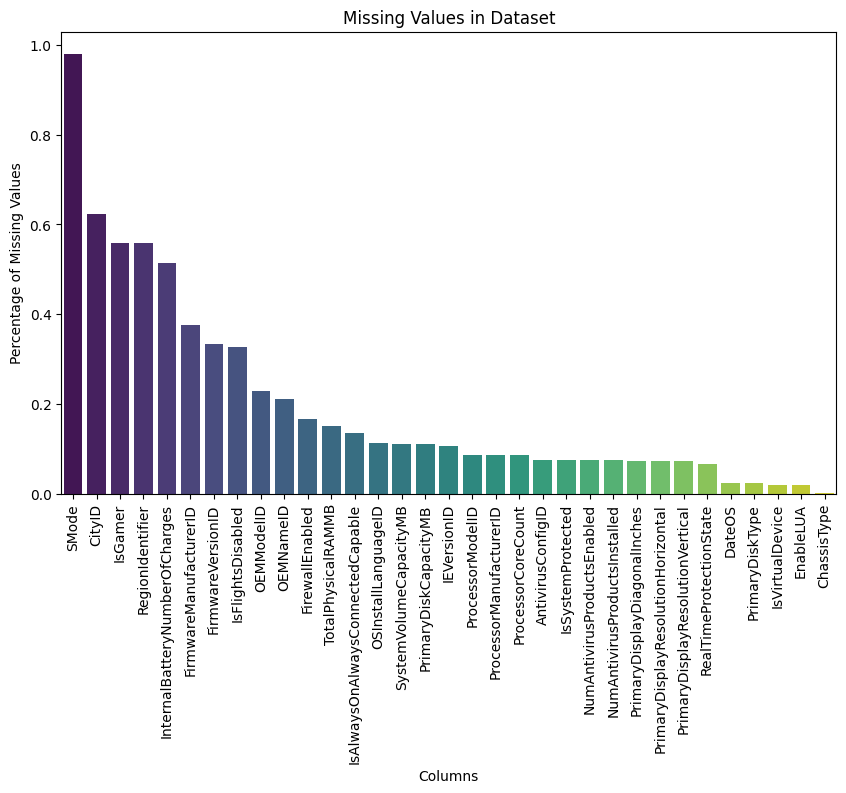

In [15]:
# Compute percentage of missing values in each column
missing_values = data.isnull().mean() * 100

# Select only columns with missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values in Dataset")
plt.show()

* **SMode**(98.1% missing) has the highest missing values—this feature might be removed.
* **CityID**,**IsGamer**,**RegionIdentifier** has more than 50% missing values in their respective columns.

### Identify Numerical and Categorical features

In [16]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

### Plot histograms for Numerical features

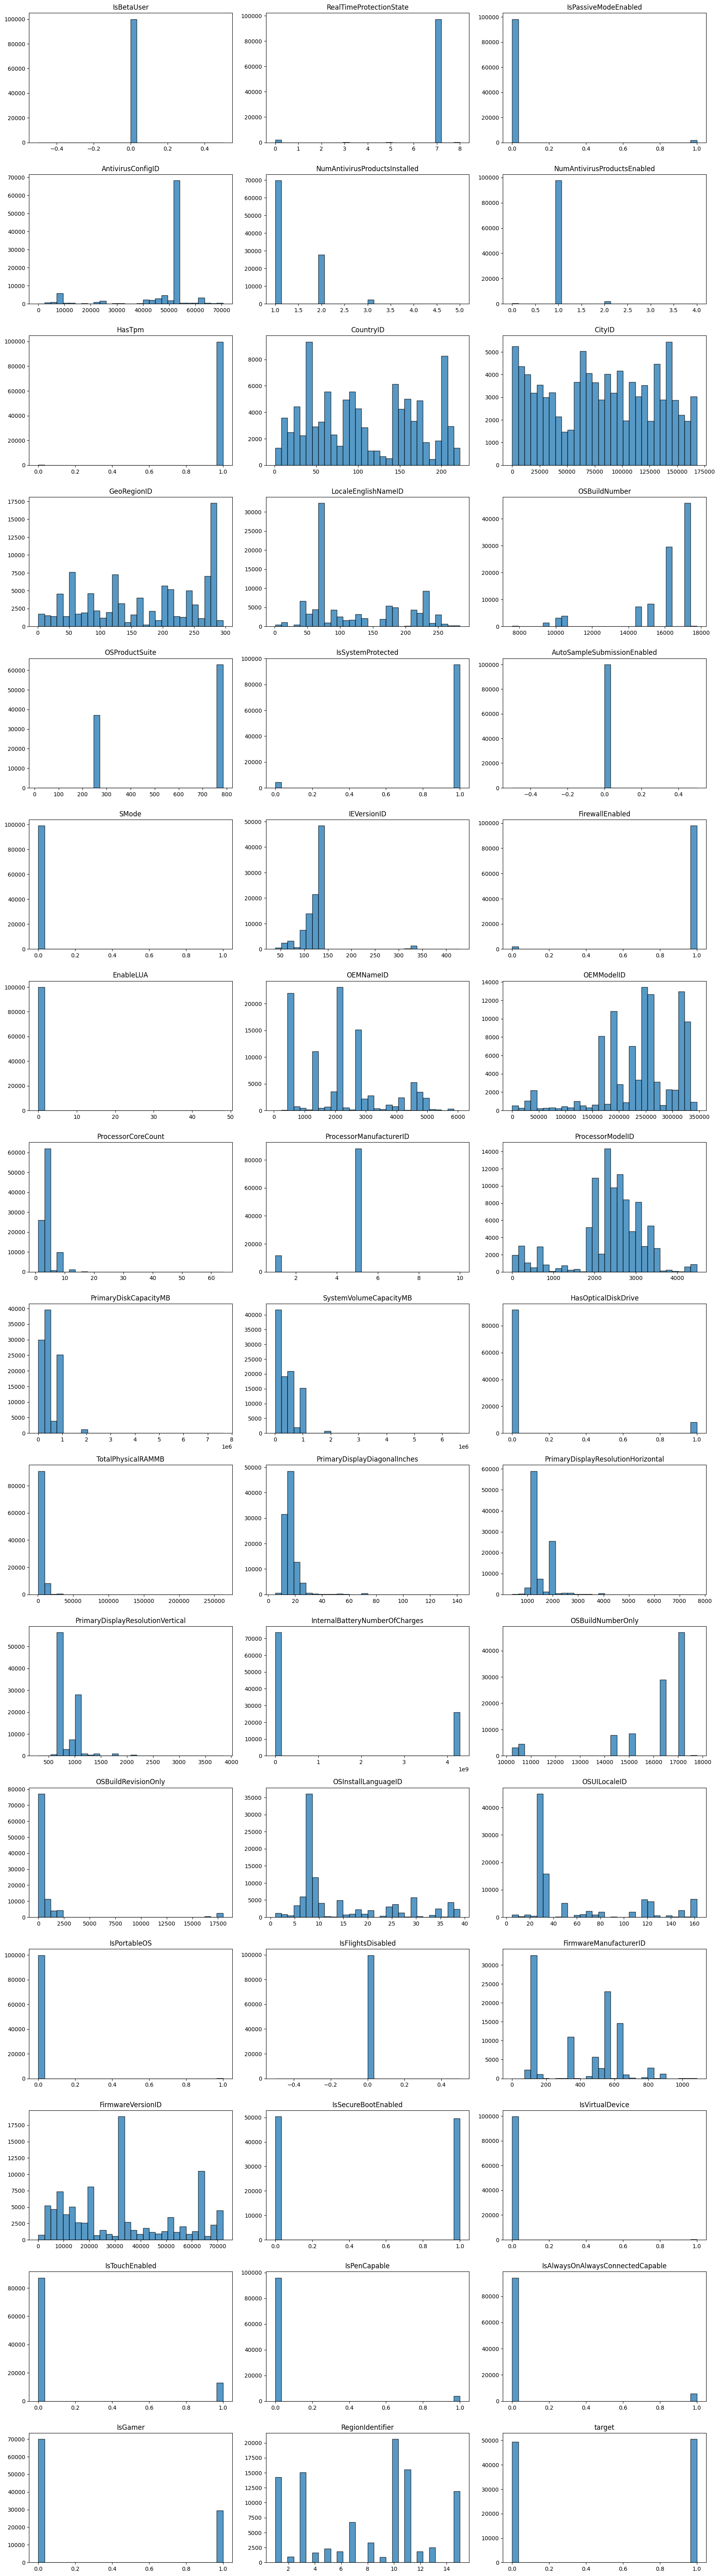

In [17]:
num_features = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(18, 4 * ((num_features // 3) + 1)))

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    data[col].hist(ax=axes[i], bins=30, edgecolor='black', alpha=0.75)
    axes[i].set_title(col)
    axes[i].grid(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* **'IsBetaUser'**, **'AutoSampleSubmissionEnabled'**, **'IsFlightsDisabled'** show degenerate distribution.
* Most numerical features have right-skewed distributions.
* Some features have uniform distributions, suggesting they might not be useful for prediction.
* The target variable is almost balanced (49.5% vs. 50.5%).

### Plotting box plot for Numerical features

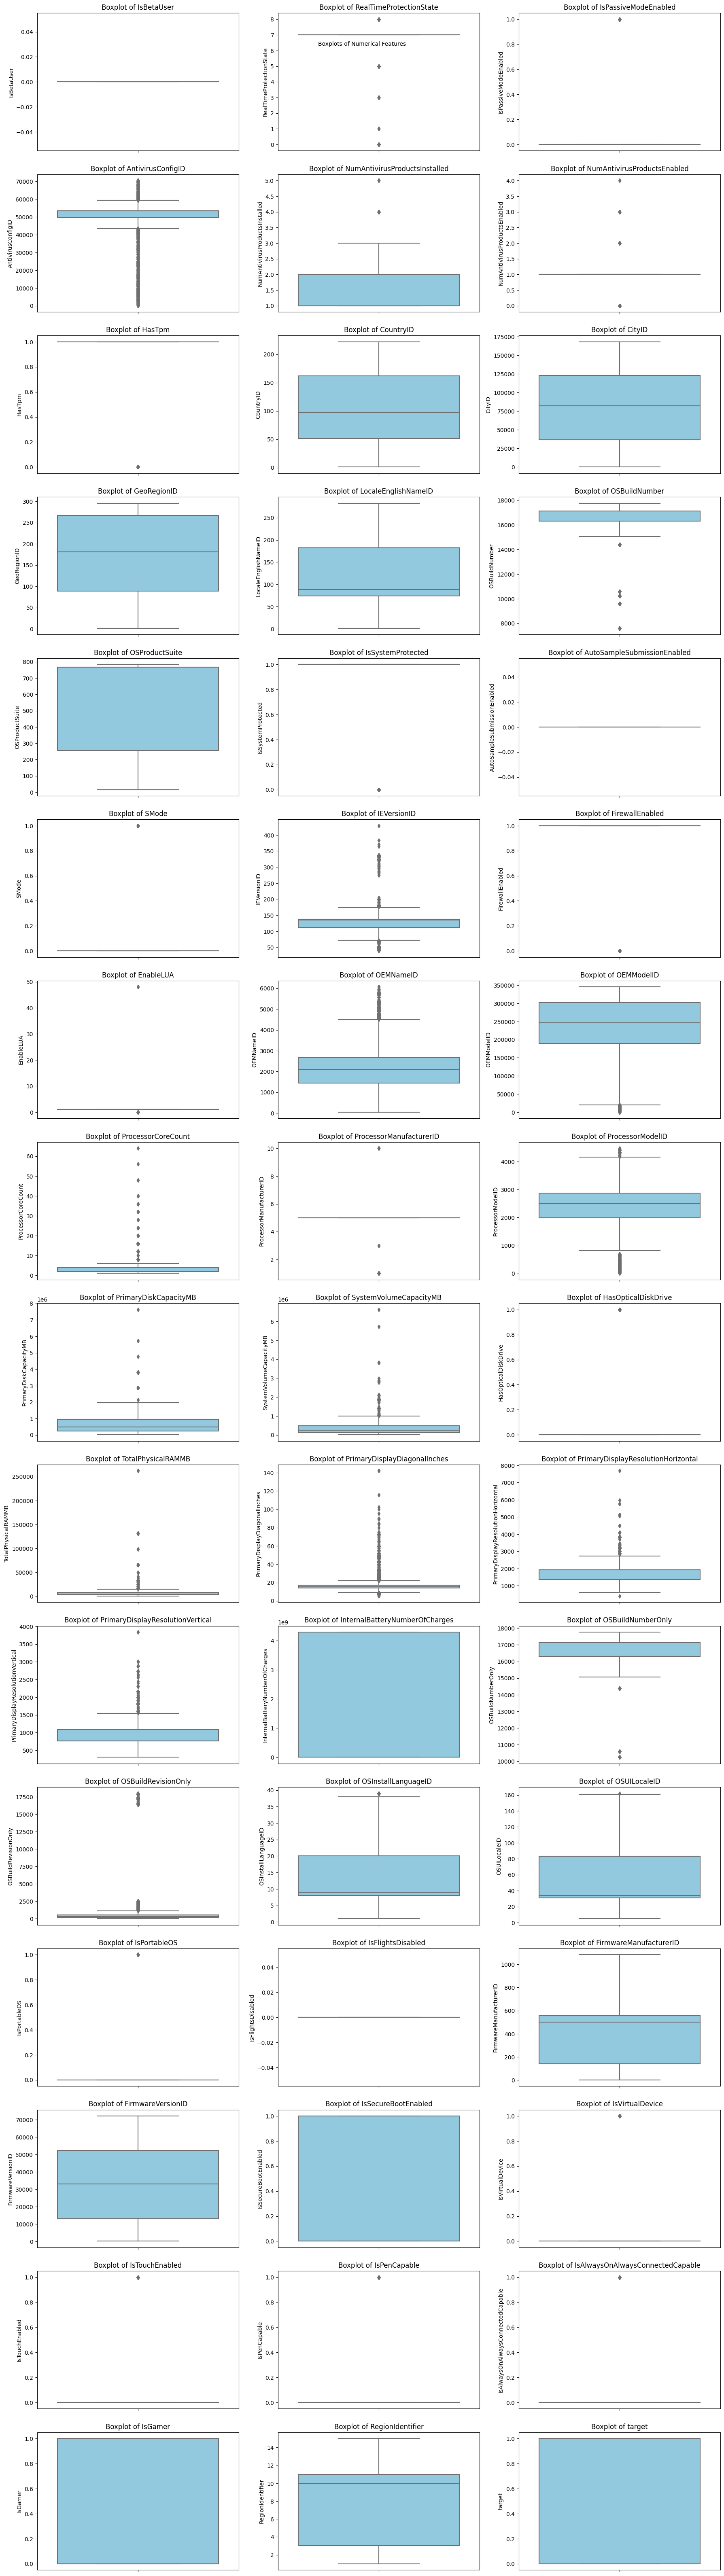

In [18]:
fig, axes = plt.subplots(nrows=(len(numerical_columns) // 3) + 1, ncols=3, figsize=(18, 4 * ((len(numerical_columns) // 3) + 1)))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots of Numerical Features", fontsize=10)
plt.tight_layout()
plt.show()

* Some numerical features contain extreme values (outliers).
* **LocaleEnglishNameID**, **OSInstallLanguageID**, **OSUILocaleID** shows positively skewed(closer to Q1).
* **RegionIdentifier**, **FirmwareManufacturerID**, **IEVersionID** show negatively skewed(closer to Q3).
* **ProcessorCoreCount**, **TotalPhysicalRAMMB**, **PrimaryDisplayDiagonalInches**, **SystemVolumeCapacityMB** show lesser spread.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


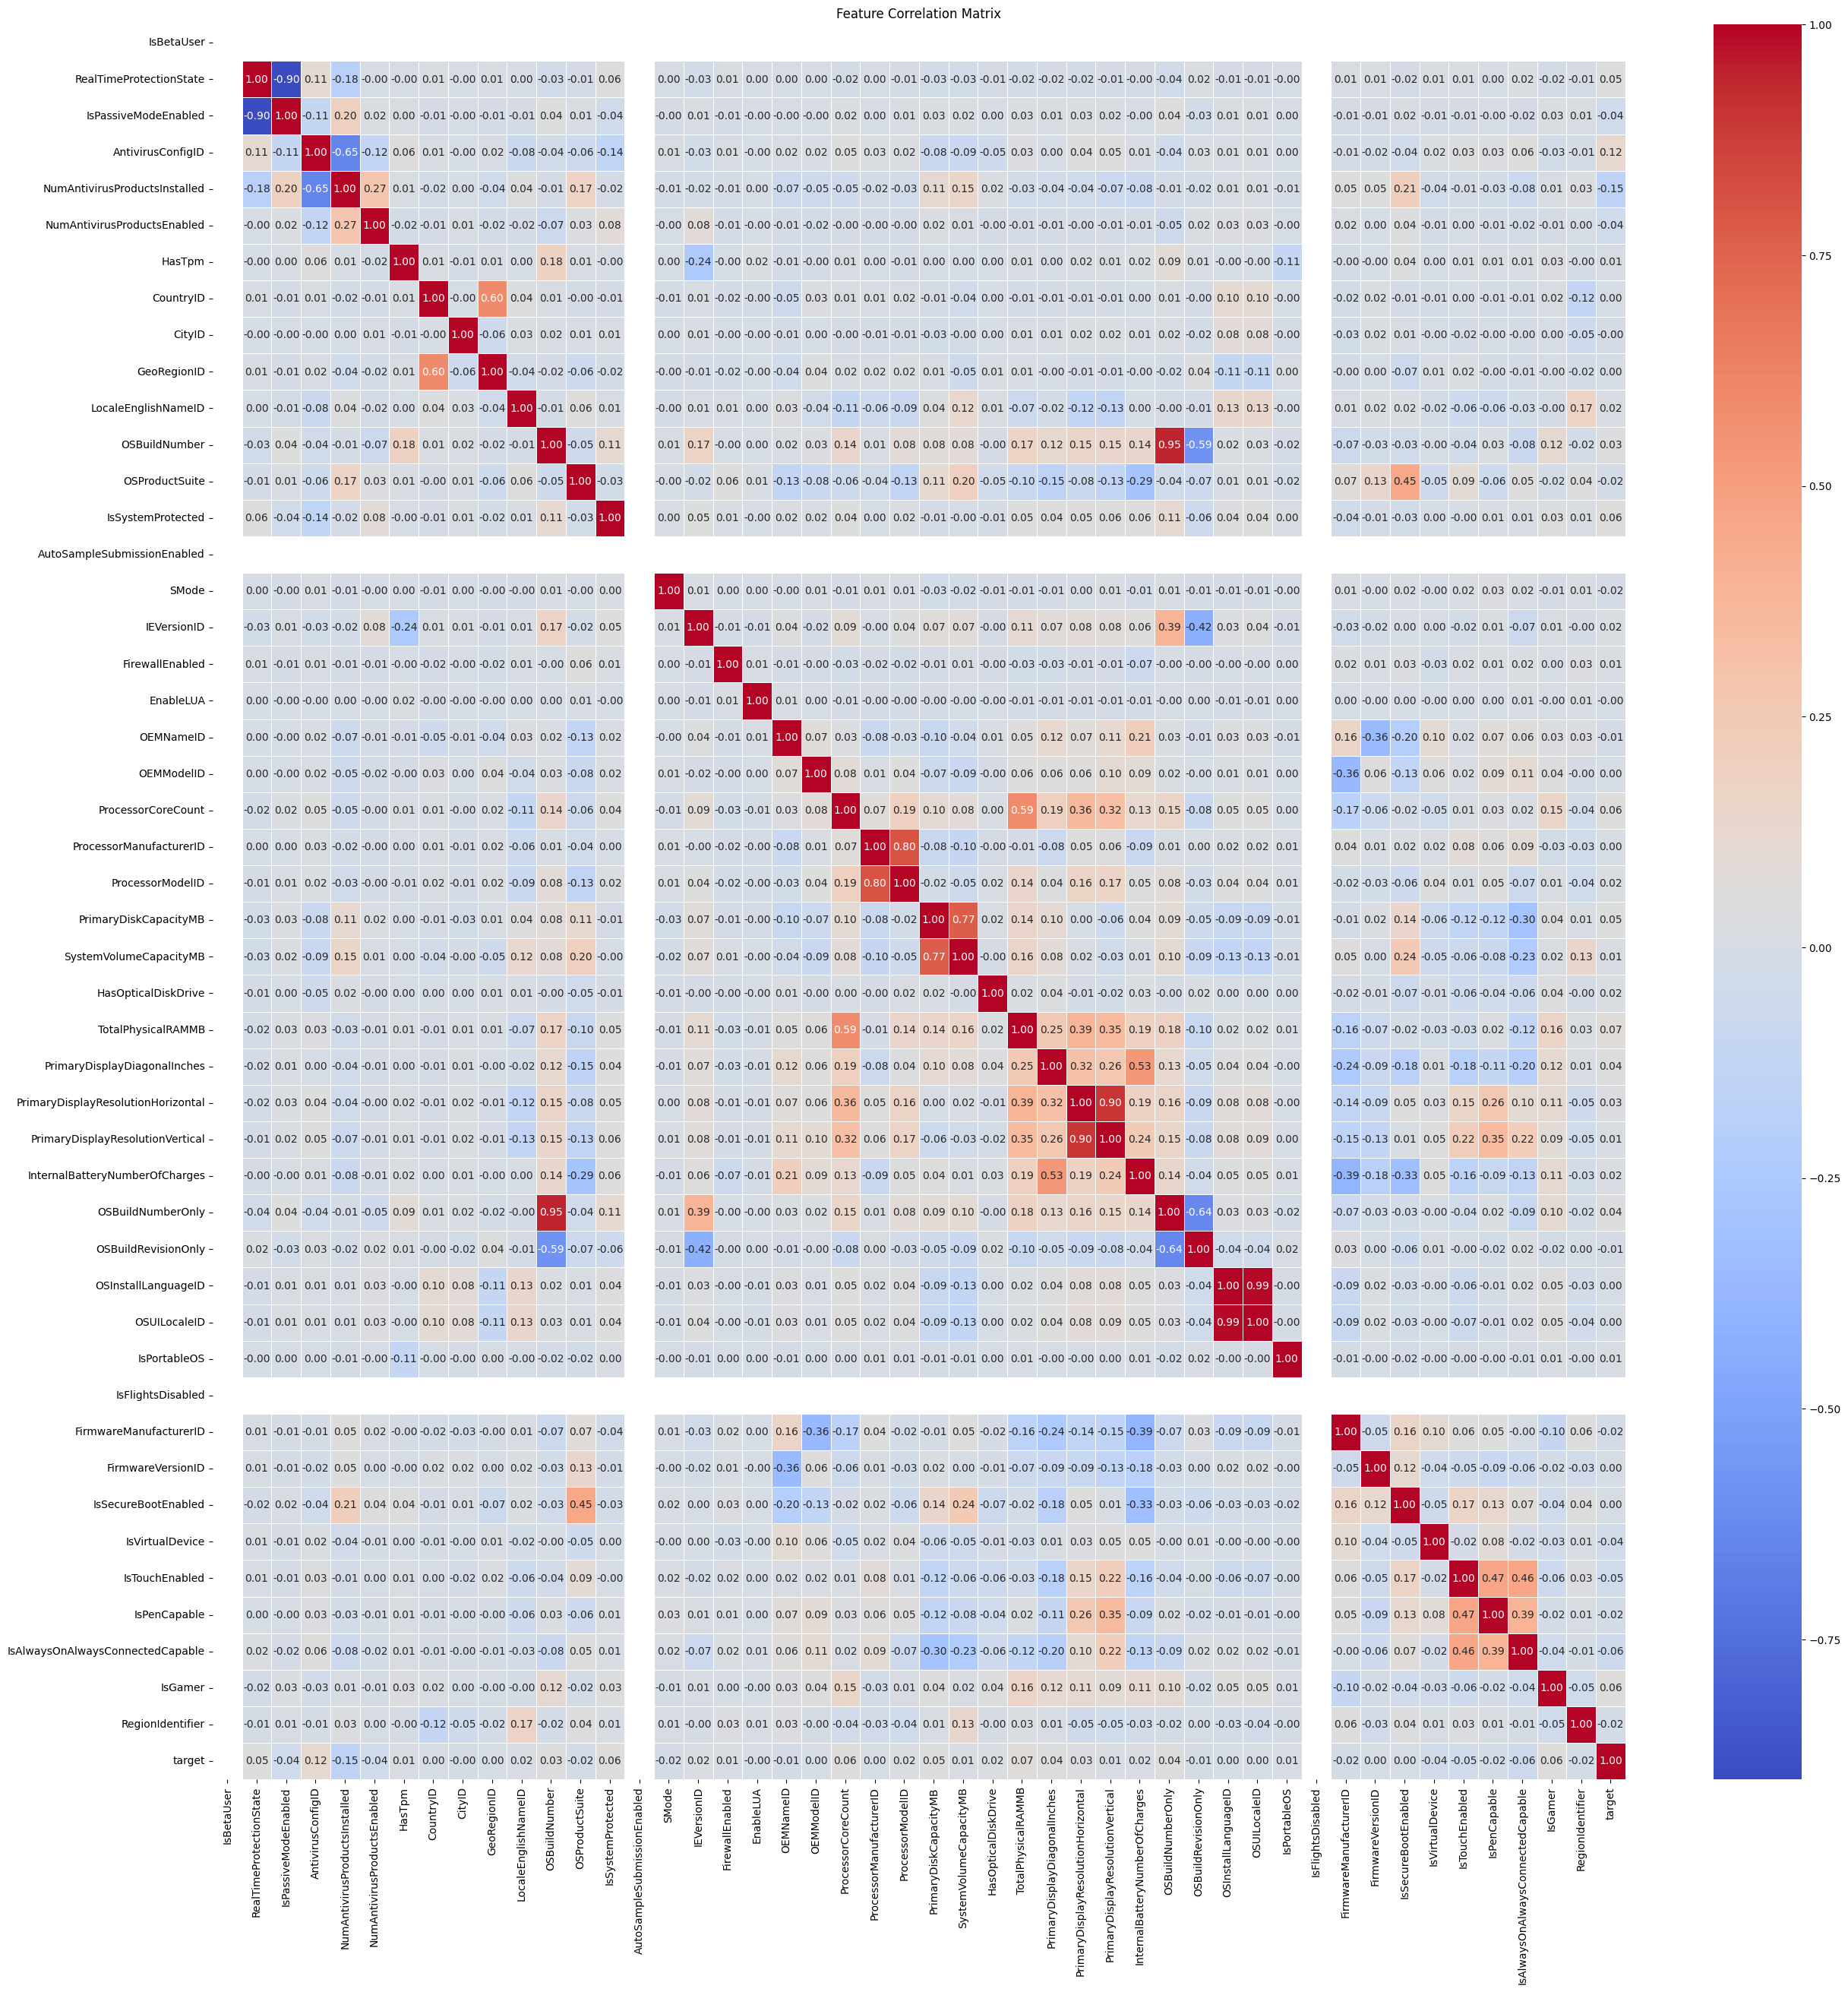

In [19]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_features.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

* Most of the features are independent columns.
* Darkest blue color shows strong negative correlation.
* Darkest red color show strong poitive correlation.

### Key Insights from Exploratory Data Analysis (EDA)
* It contains too many features.
* It contains missing values for certain features.
* It contains numerical features and categorical features.
* Numerical features are not on the same scale.
* Most features shows different distribution.
* Some numerical features contain extreme values (outliers).
* Most of the features are independent columns.

## Step 3: Data Preprocessing & Feature Engineering

### Import Necessary Libraries for data preprocessing

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

### Separate features and labels from the training set.

In [21]:
X_train = data.drop("target", axis=1)
y_train = data['target'].copy()

In [22]:
X_test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

### Malware risk calculation

* **DateAS**: This represents the date when the malware signature was recorded by the antivirus software.
* **DateOS**: This represents the last date when the system’s operating system was updated.

Here we compute time gap between DateAS and DateOS
*  If DateAS is after DateOS → The malware was identified after the last OS update. The system might have been exposed during this period.
*  If DateAS is before DateOS → The OS was updated after the malware was already known. If the update included security patches, the system might be protected.
    
So, We compute **Update_Lag_Days**
*  Positive Value → Malware signature (DateAS) was added after the last OS update (DateOS).
*  Negative Value → Malware signature (DateAS) was added before the last OS update (DateOS)

In [23]:
X_train["DateAS"] = pd.to_datetime(X_train["DateAS"], format="%Y-%m-%d %H:%M:%S") 
X_train["DateOS"] = pd.to_datetime(X_train["DateOS"], format="%Y-%m-%d") 
X_train["Update_Lag_Days"] = (X_train["DateAS"] - X_train["DateOS"]).dt.days
X_train = X_train.drop(["DateOS", "DateAS"], axis=1)

In [24]:
X_test["DateAS"] = pd.to_datetime(X_test["DateAS"], format="%Y-%m-%d %H:%M:%S") 
X_test["DateOS"] = pd.to_datetime(X_test["DateOS"], format="%Y-%m-%d") 
X_test["Update_Lag_Days"] = (X_test["DateAS"] - X_test["DateOS"]).dt.days
X_test = X_test.drop(["DateOS", "DateAS"], axis=1)

### Data Cleaning
1. Handling Missing Values
2. Feature Scaling
3. Categorical Transformers

In [25]:
X_train.isna().sum()

MachineID                             0
ProductName                           0
EngineVersion                         0
AppVersion                            0
SignatureVersion                      0
                                   ... 
IsPenCapable                          0
IsAlwaysOnAlwaysConnectedCapable    134
IsGamer                             559
RegionIdentifier                    559
Update_Lag_Days                      24
Length: 74, dtype: int64

### Define Numerical columns and Categorical columns

In [26]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

#### Count Unique values of Numerical Columns

In [27]:
for col in numerical_columns:
    print(col,len(X_train[col].value_counts()))

IsBetaUser 1
RealTimeProtectionState 6
IsPassiveModeEnabled 2
AntivirusConfigID 1976
NumAntivirusProductsInstalled 5
NumAntivirusProductsEnabled 5
HasTpm 2
CountryID 220
CityID 16047
GeoRegionID 239
LocaleEnglishNameID 185
OSBuildNumber 24
OSProductSuite 7
IsSystemProtected 2
AutoSampleSubmissionEnabled 1
SMode 2
IEVersionID 102
FirewallEnabled 2
EnableLUA 3
OEMNameID 837
OEMModelID 15952
ProcessorCoreCount 19
ProcessorManufacturerID 4
ProcessorModelID 1659
PrimaryDiskCapacityMB 398
SystemVolumeCapacityMB 46188
HasOpticalDiskDrive 2
TotalPhysicalRAMMB 127
PrimaryDisplayDiagonalInches 362
PrimaryDisplayResolutionHorizontal 121
PrimaryDisplayResolutionVertical 131
InternalBatteryNumberOfCharges 1760
OSBuildNumberOnly 23
OSBuildRevisionOnly 199
OSInstallLanguageID 39
OSUILocaleID 64
IsPortableOS 2
IsFlightsDisabled 1
FirmwareManufacturerID 169
FirmwareVersionID 12299
IsSecureBootEnabled 2
IsVirtualDevice 2
IsTouchEnabled 2
IsPenCapable 2
IsAlwaysOnAlwaysConnectedCapable 2
IsGamer 2
Region

#### Count Unique values for Categorical Columns

In [28]:
for col in categorical_columns:
    print(col,len(X_train[col].value_counts()))

MachineID 99835
ProductName 2
EngineVersion 37
AppVersion 69
SignatureVersion 2735
PlatformType 4
Processor 3
OSVersion 7
OsPlatformSubRelease 9
OSBuildLab 281
SKUEditionName 8
MDC2FormFactor 11
DeviceFamily 2
PrimaryDiskType 4
ChassisType 28
PowerPlatformRole 9
NumericOSVersion 221
OSArchitecture 3
OSBranch 13
OSEdition 20
OSSkuFriendlyName 18
OSInstallType 9
AutoUpdateOptionsName 6
OSGenuineState 4
LicenseActivationChannel 6
FlightRing 7


### Defining Constant Columns, Binary Columns and Non-Binary Columns from Numerical Columns

In [29]:
def categorize_numerical_columns(df, numerical_cols):
    const_columns = []
    binary_columns = []
    non_binary_columns =[]
    for col in numerical_cols:
        unique_values = df[col].dropna().unique()  # Drop NA values and get unique values
        unique_count = len(unique_values)
        if unique_count == 1:
            const_columns.append(col)
        elif unique_count == 2:
            binary_columns.append(col)
        else:
            non_binary_columns.append(col)
    return const_columns, binary_columns, non_binary_columns

### Defining High Cardinality, Medium Cardinality and Low Cardinality columns from Categorical Columns

In [30]:
def categorize_categorical_columns(df, categorical_columns):
    high_cardinality = []
    medium_cardinality = []
    low_cardinality = []

    for col in categorical_columns:
        unique_count = df[col].dropna().nunique()  # Get the number of unique values

        if unique_count > 30:
            high_cardinality.append(col)
        elif 6 < unique_count <= 30:
            medium_cardinality.append(col)
        else:
            low_cardinality.append(col)

    return high_cardinality, medium_cardinality, low_cardinality 

In [31]:
const_columns, binary_columns, non_binary_columns = categorize_numerical_columns(X_train, numerical_columns)
high_cardinality_columns, medium_cardinality_columns, low_cardinality_columns = categorize_categorical_columns(X_train, categorical_columns)
print("Constant Columns:", const_columns)
print("Binary Columns:", binary_columns)
print("Non-Binary Columns:", non_binary_columns)
print("High Cardinality Columns:", high_cardinality_columns)
print("Medium Cardinality Columns:", medium_cardinality_columns)
print("Low Cardinality Columns:", low_cardinality_columns)

Constant Columns: ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']
Binary Columns: ['IsPassiveModeEnabled', 'HasTpm', 'IsSystemProtected', 'SMode', 'FirewallEnabled', 'HasOpticalDiskDrive', 'IsPortableOS', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsTouchEnabled', 'IsPenCapable', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer']
Non-Binary Columns: ['RealTimeProtectionState', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite', 'IEVersionID', 'EnableLUA', 'OEMNameID', 'OEMModelID', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'InternalBatteryNumberOfCharges', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSUILocaleID', 'Fir

### Transforming list of columns into the dataframe

In [32]:
const_data_columns = X_train[const_columns] 
binary_data_columns = X_train[binary_columns]
non_binary_data_columns = X_train[non_binary_columns]
high_cardinality_data_columns = X_train[high_cardinality_columns]
medium_cardinality_data_columns = X_train[medium_cardinality_columns]
low_cardinality_data_columns = X_train[low_cardinality_columns]

### Implementing Data Cleaning using pipeline

In [33]:
const_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [34]:
binary_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
])

In [35]:
non_binary_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   
])

In [36]:
high_cardinality_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [37]:
medium_cardinality_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

In [38]:
low_cardinality_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder())
])

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ('constant',const_pipeline, const_columns),
        ('binary', binary_pipeline, binary_columns),
        ('non_binary', non_binary_pipeline, non_binary_columns),
        ('high_cardinality', high_cardinality_pipeline, high_cardinality_columns),
        ('medium_cardinality', medium_cardinality_pipeline, medium_cardinality_columns),
        ('low_cardinality', low_cardinality_pipeline, low_cardinality_columns)
    ])

In [40]:
data_preprocessed = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('filter_selection', VarianceThreshold(threshold=0.01)),
    ('minmaxScalar', MinMaxScaler())
])

### Visualizing the Transformers

In [41]:
from sklearn import set_config
set_config(display="diagram")
data_preprocessed

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('constant',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IsBetaUser',
                                                   'AutoSampleSubmissionEnabled',
                                                   'IsFlightsDisabled']),
                                                 ('binary',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IsPassiveModeEnabled',
                                                   'HasTpm',
                                                   'IsSystemProtected', 'SMod...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ProductName',
                                                   'PlatformType', 'Processor',
                                                   'DeviceFamily',
                                                   'PrimaryDiskType',
                                                   'OSArchitecture',
                                                   'AutoUpdateOptionsName',
                                                   'OSGenuineState',
                                                   'LicenseActivationChannel'])])),
                ('filter_selection', VarianceThreshold(threshold=0.01)),
                ('minmaxScalar', MinMaxScaler())])

### Fit and Transform the dataset

In [42]:
X_train_changed = pd.DataFrame(data_preprocessed.fit_transform(X_train,y_train))

In [43]:
X_test_changed = pd.DataFrame(data_preprocessed.transform(X_test))

## Step 4: Splitting Data into Training & Testing Sets

### Import Libraries for Splitting the dataset

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train_changed, y_train, test_size=0.2, random_state=42)

## Step 5: Model Selection & Training

In [46]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Implementation of Baseline Model(Dummy Classifier)

In [47]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_sample, y_train_sample)
y_pred_dummy = dummy_clf.predict(X_test_sample)

# Check accuracy
dummy_accuracy = accuracy_score(y_test_sample, y_pred_dummy)
print("Baseline Accuracy (Most Frequent Class):", dummy_accuracy)


Baseline Accuracy (Most Frequent Class): 0.5061


### Implementation of Logistic Regression

In [48]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_sample, y_train_sample)
y_pred_log = log_reg.predict(X_test_sample)
acc_log = accuracy_score(y_test_sample, y_pred_log)

### Classification Report of Logistic Regression

In [49]:
print("\nTraining Set Results:")
y_pred_train = log_reg.predict(X_train_sample)
print(classification_report(y_train_sample, y_pred_train))

print("\nTest Set Results:")
y_pred_test = log_reg.predict(X_test_sample)
print(classification_report(y_test_sample, y_pred_test))


Training Set Results:
              precision    recall  f1-score   support

           0       0.61      0.53      0.57     39597
           1       0.59      0.67      0.63     40403

    accuracy                           0.60     80000
   macro avg       0.60      0.60      0.60     80000
weighted avg       0.60      0.60      0.60     80000


Test Set Results:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56      9878
           1       0.59      0.66      0.62     10122

    accuracy                           0.60     20000
   macro avg       0.60      0.59      0.59     20000
weighted avg       0.60      0.60      0.59     20000



### Observation(Logistic Regression)
**Test Accuracy:** 0.60
**Train Accuracy:** 0.60

* Performance on train and test sets is almost identical → **No overfitting.**
* Both precision and recall are around 0.60 for both classes.
* Model is **too simple to capture complex patterns.**

**Conclusion:** Logistic Regression is **underfitting** and not a good choice.

### Implementation of Random Forest

In [50]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sample, y_train_sample)
y_pred_rf = rf.predict(X_test_sample)
acc_rf = accuracy_score(y_test_sample, y_pred_rf)

### Classification Report of Random Forest

In [51]:
print("\nTraining Set Results:")
y_pred_train = rf.predict(X_train_sample)
print(classification_report(y_train_sample, y_pred_train))

print("\nTest Set Results:")
y_pred_test = rf.predict(X_test_sample)
print(classification_report(y_test_sample, y_pred_test))


Training Set Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39597
           1       1.00      1.00      1.00     40403

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000


Test Set Results:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      9878
           1       0.62      0.64      0.63     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



### Observation(Random Forest)
**Test Accuracy:** 0.62 
**Train Accuracy:** 1.00

* **Overfitting!** Train accuracy is 1.00, but test accuracy is only 0.62.
* Precision and recall improved slightly over Logistic Regression.
* Model memorized training data, **leading to poor generalization**.

**Conclusion:**  Random Forest needs **regularization** (reduce depth, limit features, or use pruning).

### Implementation of XGBoost

In [52]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_sample, y_train_sample)
y_pred_xgb = xgb_clf.predict(X_test_sample)
acc_xgb = accuracy_score(y_test_sample, y_pred_xgb)

### Classification of XGBoost

In [53]:
print("\nTraining Set Results:")
y_pred_train = xgb_clf.predict(X_train_sample)
print(classification_report(y_train_sample, y_pred_train))

print("\nTest Set Results:")
y_pred_test = xgb_clf.predict(X_test_sample)
print(classification_report(y_test_sample, y_pred_test))


Training Set Results:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72     39597
           1       0.72      0.77      0.74     40403

    accuracy                           0.73     80000
   macro avg       0.73      0.73      0.73     80000
weighted avg       0.73      0.73      0.73     80000


Test Set Results:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9878
           1       0.62      0.66      0.64     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



### Observation(XGBoost)
**Test Accuracy:** 0.62 
**Train Accuracy:** 0.73

* Best test accuracy (0.62, slightly better than Random Forest).
* Less overfitting than Random Forest (train accuracy = 0.73).
* More balanced precision and recall values across both classes.

**Conclusion:**  XGBoost is the **best model** so far! It **captures patterns better** than Logistic Regression and **overfits** less than Random Forest.

In [54]:
print(f'Logistic Regression Accuracy: {acc_log:.4f}')
print(f'Random Forest Accuracy: {acc_rf:.4f}')
print(f'XGBoost Accuracy: {acc_xgb:.4f}')

Logistic Regression Accuracy: 0.5954
Random Forest Accuracy: 0.6190
XGBoost Accuracy: 0.6233


### Comparing Accuracy Score of three Models: Logistic Regression, Random Forest, XGBoost

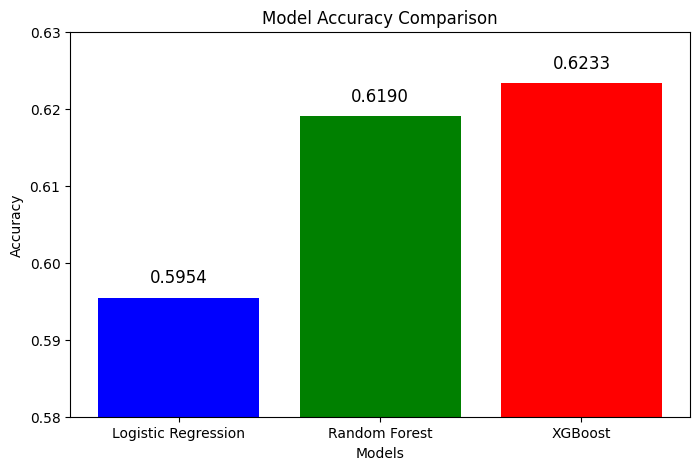

In [55]:
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracies = [0.5954, 0.6190, 0.6233]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.58, 0.63) 

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f"{acc:.4f}", ha='center', fontsize=12)

plt.show()


## Step 6: Model Evaluation & Optimization

### Import necessary library for Hypertunning

In [56]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

### Define the parameter grid

In [57]:
param_grid = {
    'n_estimators': [100, 200],      # Number of boosting rounds
    'learning_rate': [0.01, 0.1],    # Step size shrinkage
    'max_depth': [3, 5],             # Maximum depth of trees
    'subsample': [0.8, 1.0],         # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0]   # Fraction of features used per tree
}

### Intialize the XGBoost Classifier

In [58]:
xgb_model = xgb.XGBClassifier(random_state=42)

### Perform Grid Search with 3 fold cross validation

In [59]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,         
    verbose=2,
    n_jobs=-1      
)

### Fit the model

In [60]:
grid_search.fit(X_train_sample, y_train_sample)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

### Best parameters

In [61]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


### Best Model

In [62]:
best_xgb = grid_search.best_estimator_

### Evaluate the model

In [63]:
y_pred = best_xgb.predict(X_test_sample)

### Classification Report of the Updated Model

In [64]:
print(classification_report(y_test_sample, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61      9878
           1       0.62      0.68      0.65     10122

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



### Train with Evaluation set

In [65]:
best_xgb.fit(X_train_changed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [66]:
y_pred=best_xgb.predict(X_test_changed)

In [67]:
submission= pd.DataFrame({"id": range(0,X_test.shape[0]), 
                          "target": y_pred})

submission.to_csv('submission.csv',index=False)